# Importing Signals in Subfolders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set_style("whitegrid")

In [2]:
# To avoid:
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized.
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

This code imports the first signal in the data set so that we can see the format of each file. There are three accelerometer signals (x, y, and z).

In [3]:
pd.read_csv("../data/flooddata/depth_0_0/exp1.csv")

,ax,ay,az
0,-0.466,-1.913,-1.022
1,-0.941,-2.208,-0.317
2,0.642,-1.154,-1.068
3,1.527,1.575,-1.185
4,-0.154,4.816,-0.198
...,...,...,...
101,-0.745,0.690,1.417
102,-0.809,-0.784,-0.410
103,0.335,-1.755,0.044
104,-0.504,-0.488,-0.760


Create a dataset to access data stored in multiple files.

In [4]:
train_dataset = tf.data.Dataset.list_files("../data/flooddata/*/*.csv", shuffle=False)
train_dataset = train_dataset.batch(1)

Show data files.

In [5]:
files = []
for file in train_dataset:
    files.append(file.numpy().astype(str)[0])
files

['..\\data\\flooddata\\depth_0_0\\exp1.csv',
 '..\\data\\flooddata\\depth_0_0\\exp10.csv',
 '..\\data\\flooddata\\depth_0_0\\exp11.csv',
 '..\\data\\flooddata\\depth_0_0\\exp12.csv',
 '..\\data\\flooddata\\depth_0_0\\exp13.csv',
 '..\\data\\flooddata\\depth_0_0\\exp14.csv',
 '..\\data\\flooddata\\depth_0_0\\exp15.csv',
 '..\\data\\flooddata\\depth_0_0\\exp16.csv',
 '..\\data\\flooddata\\depth_0_0\\exp17.csv',
 '..\\data\\flooddata\\depth_0_0\\exp18.csv',
 '..\\data\\flooddata\\depth_0_0\\exp19.csv',
 '..\\data\\flooddata\\depth_0_0\\exp2.csv',
 '..\\data\\flooddata\\depth_0_0\\exp20.csv',
 '..\\data\\flooddata\\depth_0_0\\exp21.csv',
 '..\\data\\flooddata\\depth_0_0\\exp22.csv',
 '..\\data\\flooddata\\depth_0_0\\exp23.csv',
 '..\\data\\flooddata\\depth_0_0\\exp24.csv',
 '..\\data\\flooddata\\depth_0_0\\exp25.csv',
 '..\\data\\flooddata\\depth_0_0\\exp26.csv',
 '..\\data\\flooddata\\depth_0_0\\exp27.csv',
 '..\\data\\flooddata\\depth_0_0\\exp28.csv',
 '..\\data\\flooddata\\depth_0_0\\ex

Using the take() function the first time will import the data from the first file.

In [6]:
for file in train_dataset.take(1):
    signal = pd.read_csv(file.numpy().astype(str)[0])
signal

,ax,ay,az
0,-0.466,-1.913,-1.022
1,-0.941,-2.208,-0.317
2,0.642,-1.154,-1.068
3,1.527,1.575,-1.185
4,-0.154,4.816,-0.198
...,...,...,...
101,-0.745,0.690,1.417
102,-0.809,-0.784,-0.410
103,0.335,-1.755,0.044
104,-0.504,-0.488,-0.760


Visualize the signal.

<Figure size 640x480 with 0 Axes>

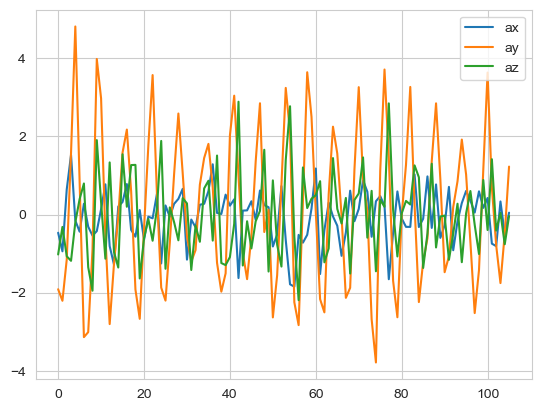

In [7]:
plt.figure()
signal.plot()
plt.show()